In [1]:
%matplotlib inline
from quake_visualizer import Cell3DViewer
import plot_quake
from quake import Earthquake
        

[[  3.31868278e-01   3.88339938e-01  -4.78493421e-01 ...,   1.93022453e-01
    2.76086651e-01   5.96121685e-02]
 [ -4.80821349e-01   4.64405966e-01   3.00586854e-01 ...,  -8.70306827e-02
   -3.33223178e-01   1.07926311e-02]
 [  4.20721829e-01   1.77472683e-02   1.21229255e-02 ...,  -4.27721520e-01
   -4.26815205e-01  -2.11501866e-01]
 ..., 
 [  2.74629370e-01  -1.70278831e-01  -1.10741984e-01 ...,   1.05025493e-02
    1.86768912e-01   5.99898727e-02]
 [  1.19646512e-01  -1.47447707e-02   2.65028034e-01 ...,  -1.82538125e-01
    1.12500303e-01  -4.45741442e-01]
 [ -3.48818659e-01  -1.18379437e-01  -7.32853807e-02 ...,   3.86446059e-01
    2.49733592e-01   1.07251337e-04]]


nan

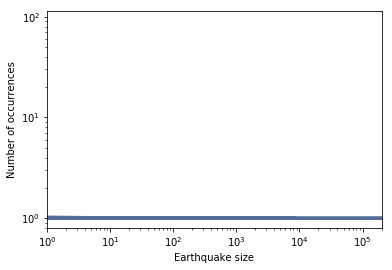

In [4]:
plot_quake.calculate_power_law(n=1000, iters=100, plot=True)

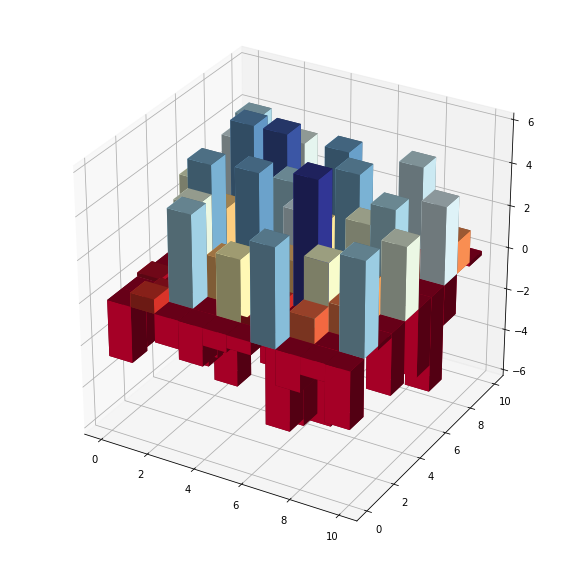

In [6]:
quake = Earthquake(10)
max_val = quake.get_max_force()
vis = Cell3DViewer(quake,z_limit=[-max_val, max_val])
anim = vis.animate(frames=50, interval=20)

In [ ]:
anim

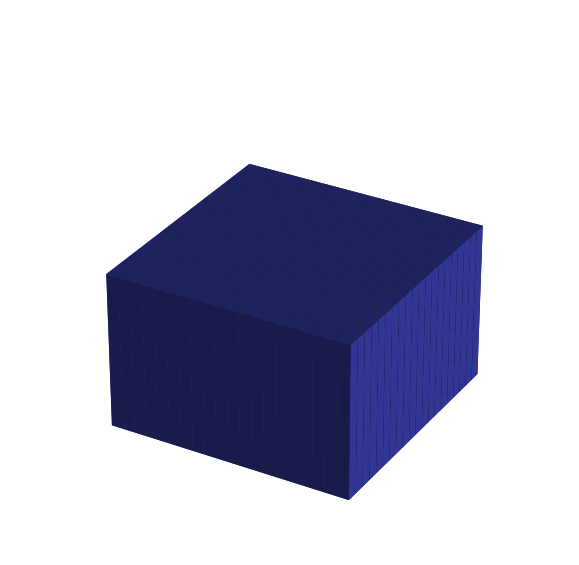

In [14]:
from Sand import SandPile, SandPileViewer

pile = SandPile(n=20, level=6)


viewer = Cell3DViewer(pile)
# viewer.live_animate()
anim = viewer.animate(frames=100, interval=10)

In [15]:
anim

In [41]:
anim.save('basic_animation.mp4', fps=24, extra_args=['-vcodec', 'libx264'])

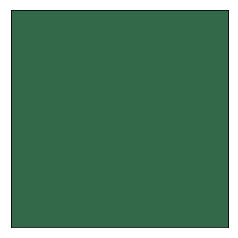

In [6]:
%matplotlib inline
from Sand import SandPile, SandPileViewer

pile = SandPile(10)

viewer = Cell2DViewer(pile)
# viewer.live_animate()
anim = viewer.animate(frames=400, interval=10)

In [7]:
anim